In [1]:
# print(K.tensorflow_backend._get_available_gpus())
from __future__ import absolute_import, division, print_function, unicode_literals
#
import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device,True)

In [17]:
tf.device('/device:XLA_GPU:0')

In [18]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())


['/device:CPU:0', '/device:XLA_CPU:0', '/device:XLA_GPU:0', '/device:XLA_GPU:1']


In [182]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Attention,MaxPool1D,Dense, Conv1D, Convolution2D, GRU, LSTM, Bidirectional, TimeDistributed,
                          Dropout, Flatten, LayerNormalization,RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import load_model
from sklearn import preprocessing
from tensorflow.keras.models import load_model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn import linear_model
import pandas as pd
import torch
import torch.nn as nn
import random
#from keras import layers as layers
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy import special
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
#from keras_self_attention import SeqSelfAttention

from sklearn.preprocessing import StandardScaler

In [198]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [199]:
scaler = StandardScaler()

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_train = scaler.fit_transform(x_train.astype('float32')) 
x_test = scaler.transform(x_test.astype('float32'))

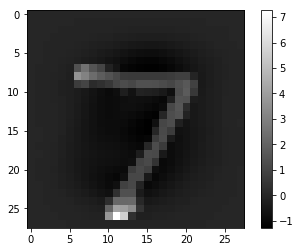

In [200]:
plt.imshow(x_test[0,:].reshape(28,28))
plt.colorbar()

In [12]:
def encode_identity_block(n_step=784,lr = 3e-4, drop_frac=0, l1_norm  = 0):
    
    X_input = layers.Input(shape=(n_step,1))
    X = X_input
    X = layers.Dense(24,activation='relu',name= 'encoder_dense')(X)
   # X = layers.add([X, X_shortcut])
    X = layers.BatchNormalization(axis=1)(X)
    X = layers.Activation('relu')(X) 
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    model.compile(Adam(lr), loss='mse')
    return model


In [13]:
encoderlayer = encode_identity_block()

In [14]:
encoderlayer.summary()

Model: "ResNet50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784, 1)]          0         
_________________________________________________________________
encoder_dense (Dense)        (None, 784, 24)           48        
_________________________________________________________________
batch_normalization_2 (Batch (None, 784, 24)           3136      
_________________________________________________________________
activation_2 (Activation)    (None, 784, 24)           0         
Total params: 3,184
Trainable params: 1,616
Non-trainable params: 1,568
_________________________________________________________________


In [42]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320

In [108]:
layer_name = 'dense_55'
intermediate_layer_model = Model(inputs=autoencoder.input,
                                 outputs=autoencoder.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_test_3d)

In [112]:
intermediate_output.shape

(10000, 16)

In [110]:
autoencoder.get_layer('dense_55').get_weights()[0].shape

(32, 16)

In [43]:
autoencoder.layers('dense_27')

TypeError: 'list' object is not callable

In [35]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)


embedding = Dense(16, activation='relu',activity_regularizer=l1(1e-4))(encoded)

decoded = Dense(64, activation='relu')(embedding)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='relu')(decoded)

In [36]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [37]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0536 - val_loss: 0.0371
Epoch 2/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0327 - val_loss: 0.0292
Epoch 3/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0277 - val_loss: 0.0260
Epoch 4/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0254 - val_loss: 0.0242
Epoch 5/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0241 - val_loss: 0.0234
Epoch 6/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0233 - val_loss: 0.0229
Epoch 7/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0227 - val_loss: 0.0222
Epoch 8/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0222 - val_loss: 0.0217
Epoch 9/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0218 - val_

In [38]:
decoded_imgs = autoencoder.predict(x_test)

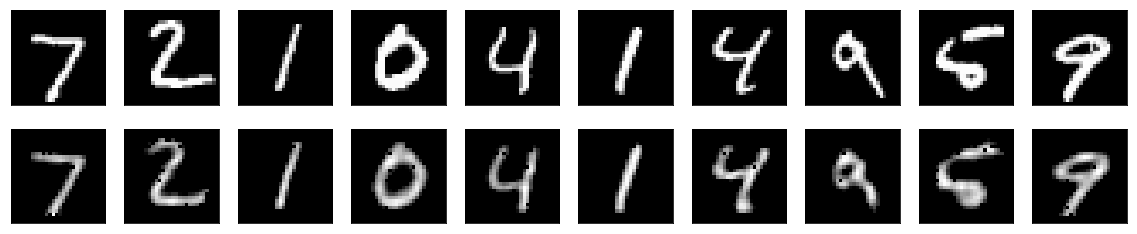

In [30]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

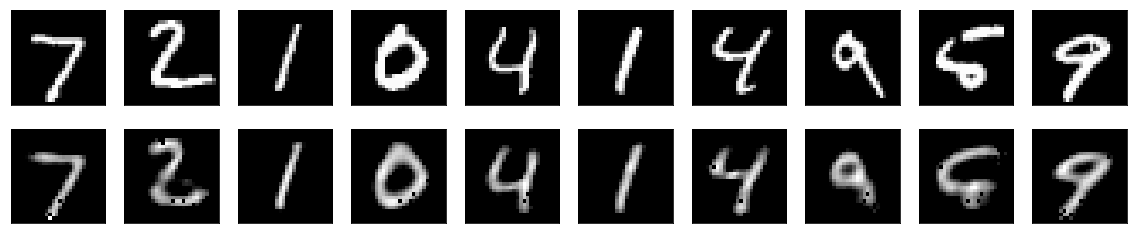

In [39]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
x = tf.transpose(x, (0, 2, 1)) 

In [90]:
input_img = Input(shape=(784,1))
encoded = Dense(256, activation='relu')(input_img)
encoded = tf.transpose(encoded, (0, 2, 1)) 
encoded = Conv1D(128, kernel_size = 2, strides=2, activation='relu',data_format='channels_last')(encoded)
#encoded = Conv1D(64, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(encoded)
encoded = Conv1D(32, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(encoded)

encoded = tf.transpose(encoded, (0, 2, 1))
encoded = Bidirectional(LSTM(16, return_sequences=False,
                             activity_regularizer=l1(1e-4)))(encoded)


embedding = Dense(16, activation='relu',activity_regularizer=l1(1e-4))(encoded)
repeat = RepeatVector(64)(embedding)


repeat = tf.transpose(repeat,(0,2,1))
attention = Attention()([repeat,repeat])

decoded = Conv1D(64, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(attention)
decoded = Conv1D(128, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(decoded)
decoded = Conv1D(784, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(decoded)
#decoded = Conv1D(784, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(decoded)
decoded = tf.transpose(decoded, (0, 2, 1))
# decoded = Bidirectional(LSTM(392, return_sequences=False,
#                              activity_regularizer=l1(1e-4)))(decoded)
decoded = Dense(1,activation='linear')(decoded)

In [91]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [81]:
input_img.shape

TensorShape([None, None, 784, 1])

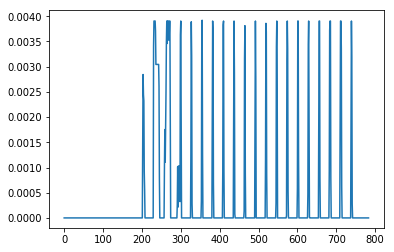

In [84]:
plt.plot(x_test[0,:])

In [135]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [136]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [137]:
x_train.shape

(60000, 28, 28, 1)

In [138]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 271us/step - loss: 0.2156 - val_loss: 0.1649
Epoch 2/50
18304/60000 [========>.....................] - ETA: 10s - loss: 0.1633

KeyboardInterrupt: 

In [139]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0   

In [147]:
input_img = Input(shape=(784, 1))  # adapt this if using `channels_first` image data format
x = Conv1D(16, 3, activation='relu', padding='same')(input_img)

In [201]:
input_img = Input(shape=(784, 1))  # adapt this if using `channels_first` image data format
x = Conv1D(16, 3, activation='relu', padding='same')(input_img)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)


# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv1D(8, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
decoded = Conv1D(1, 3, activation='linear', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [202]:
autoencoder.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 784, 1)]          0         
_________________________________________________________________
conv1d_121 (Conv1D)          (None, 784, 16)           64        
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 392, 16)           0         
_________________________________________________________________
conv1d_122 (Conv1D)          (None, 392, 8)            392       
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 196, 8)            0         
_________________________________________________________________
conv1d_123 (Conv1D)          (None, 196, 8)            200       
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 98, 8)             0  

In [203]:
x_train = np.atleast_3d(x_train)
x_test = np.atleast_3d(x_test)


autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 13s 213us/sample - loss: 0.6216 - val_loss: 0.3914
Epoch 2/50
60000/60000 [==============================] - 10s 162us/sample - loss: 0.3141 - val_loss: 0.2588
Epoch 3/50
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2396 - val_loss: 0.2124
Epoch 4/50
60000/60000 [==============================] - 10s 166us/sample - loss: 0.2032 - val_loss: 0.1883
Epoch 5/50
60000/60000 [==============================] - 10s 163us/sample - loss: 0.1800 - val_loss: 0.1685
Epoch 6/50
60000/60000 [==============================] - 10s 164us/sample - loss: 0.1620 - val_loss: 0.1543
Epoch 7/50
60000/60000 [==============================] - 9s 158us/sample - loss: 0.1491 - val_loss: 0.1431
Epoch 8/50
60000/60000 [==============================] - 10s 160us/sample - loss: 0.1389 - val_loss: 0.1333
Epoch 9/50
60000/60000 [==============================] - 10s 165us/sample - lo

In [208]:
cd Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/


/home/shuyu/497_MAT_Assignment/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks


In [209]:
autoencoder.save('conv1d.h5')

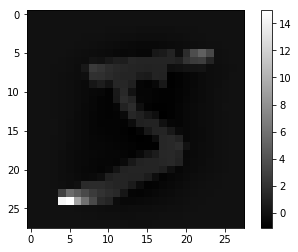

In [193]:
plt.imshow(x_train[0,:,0].reshape(28,28))
plt.colorbar()

In [206]:
decoded_image = autoencoder.predict(x_test)

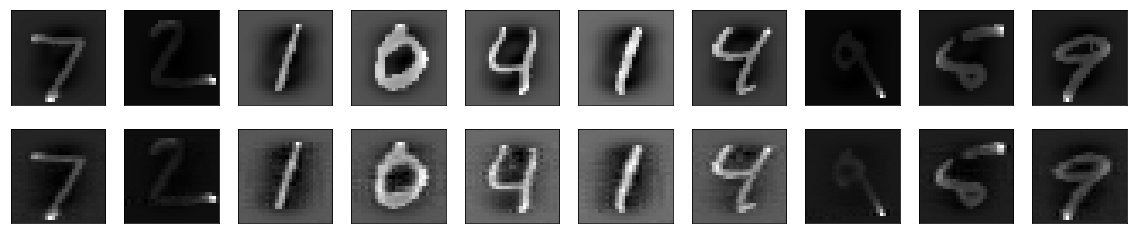

In [207]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt



n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_image[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [168]:
decoded_image

array([[[4.2098789e-03],
        [5.0659644e-05],
        [2.5362284e-05],
        ...,
        [2.6819066e-04],
        [3.3557721e-04],
        [4.4134855e-03]],

       [[4.2098789e-03],
        [5.0659644e-05],
        [2.5362284e-05],
        ...,
        [2.6819066e-04],
        [3.3557721e-04],
        [4.4134855e-03]],

       [[4.2098789e-03],
        [5.0659644e-05],
        [2.5362284e-05],
        ...,
        [2.6819066e-04],
        [3.3557721e-04],
        [4.4134855e-03]],

       ...,

       [[4.2098789e-03],
        [5.0659644e-05],
        [2.5362284e-05],
        ...,
        [2.6819066e-04],
        [3.3557721e-04],
        [4.4134855e-03]],

       [[4.2098789e-03],
        [5.0659644e-05],
        [2.5362284e-05],
        ...,
        [2.6819066e-04],
        [3.3557721e-04],
        [4.4134855e-03]],

       [[4.2098789e-03],
        [5.0659644e-05],
        [2.5362284e-05],
        ...,
        [2.6819066e-04],
        [3.3557721e-04],
        [4.4134855e-03]]

In [122]:
input_img = Input(shape=(784,1))
encoded = Conv1D(128, kernel_size = 2, strides=2, activation='relu',data_format='channels_last')(input_img)
encoded = Bidirectional(LSTM(16, return_sequences=False,
                             activity_regularizer=l1(1e-4)))(encoded)
repeat = RepeatVector(784)(encoded)
#repeat = tf.transpose(repeat,(0,2,1))
decoded = Conv1D(64, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(repeat)
decoded = Conv1D(1, kernel_size = 2,strides=2, activation='linear',data_format='channels_last')(decoded)

In [123]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [124]:
autoencoder.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 784, 1)]          0         
_________________________________________________________________
conv1d_76 (Conv1D)           (None, 392, 128)          384       
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 32)                18560     
_________________________________________________________________
repeat_vector_16 (RepeatVect (None, 784, 32)           0         
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 392, 64)           4160      
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 196, 1)            129       
Total params: 23,233
Trainable params: 23,233
Non-trainable params: 0
______________________________________________________

In [109]:
input_img = Input(shape=(784,1))
#attention = Attention()([repeat,repeat])
#attention = Attention()([repeat,repeat])
#encoded = Dense(256, activation='relu')(input_img)
#encoded = tf.transpose(encoded, (0, 2, 1)) 
encoded = Conv1D(128, kernel_size = 2, strides=2, activation='relu',data_format='channels_last')(input_img)
#encoded = Conv1D(64, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(encoded)
encoded = Conv1D(32, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(encoded)

encoded = tf.transpose(encoded, (0, 2, 1))
encoded = Bidirectional(LSTM(16, return_sequences=False,
                             activity_regularizer=l1(1e-4)))(encoded)


embedding = Dense(16, activation='relu',activity_regularizer=l1(1e-4))(encoded)
repeat = RepeatVector(784)(embedding)


repeat = tf.transpose(repeat,(0,2,1))

decoded = Conv1D(64, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(repeat)
decoded = Conv1D(128, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(decoded)
decoded = Conv1D(784, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(decoded)
#decoded = Conv1D(784, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(decoded)
decoded = tf.transpose(decoded, (0, 2, 1))
# decoded = Bidirectional(LSTM(392, return_sequences=False,
#                              activity_regularizer=l1(1e-4)))(decoded)
decoded = Dense(1,activation='linear')(decoded)

In [114]:
autoencoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 784, 1)]          0         
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 392, 128)          384       
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 196, 32)           8224      
_________________________________________________________________
tf_op_layer_transpose_48 (Te [(None, 32, 196)]         0         
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 32)                27264     
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 64, 16)            0  

In [89]:
x_train[0,0]

0.0

In [117]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_20:0", shape=(None, 784, 1), dtype=float32) at layer "input_20". The following previous layers were accessed without issue: []

In [102]:
.shape

(60000, 1, 784)

In [105]:
autoencoder.fit(x_train_3d, x_train_3d,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_3d, x_test_3d))

ValueError: Error when checking input: expected input_16 to have shape (784, 1) but got array with shape (1, 784)

In [76]:
input_img.shape

TensorShape([None, 784, 1])

In [36]:
layer_name = 'dense_4'
intermediate_layer_model = Model(inputs=autoencoder.input,
                                 outputs=autoencoder.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_test_3d)

In [37]:
intermediate_output[0]

array([0.06603657, 0.03901002, 0.01592879, 0.10585815, 0.18849578,
       0.        , 0.07689537, 0.12213866, 0.1746031 , 0.        ,
       0.08096126, 0.04012169, 0.        , 0.        , 0.07619524,
       0.        ], dtype=float32)

In [73]:
autoencoder.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 784, 1)]     0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 784, 256)     512         input_7[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_transpose_22 (Tenso [(None, 256, 784)]   0           dense_16[0][0]                   
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 128, 128)     200832      tf_op_layer_transpose_22[0][0]   
____________________________________________________________________________________________

In [87]:
x_train.shape

(60000, 784)

In [24]:
x_train_3d = np.atleast_3d(x_train)
x_test_3d = np.atleast_3d(x_test)

In [34]:
x = x_train_3d

In [54]:
x = tf.transpose(x, (0, 2, 1)) 

In [55]:
x.shape

TensorShape([60000, 784, 1])

In [42]:
trian_3d = x

In [43]:
y = x_test_3d

In [44]:
y = tf.transpose(y, (0, 2, 1)) 

In [40]:
checkpointer = ModelCheckpoint("lste_toy", monitor='loss', verbose=0, save_best_only=True)


In [69]:
autoencoder.fit(x_train_3d, x_train_3d,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_3d, x_test_3d))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0271 - val_loss: 0.0273
Epoch 2/50
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0271 - val_loss: 0.0273
Epoch 3/50
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0270 - val_loss: 0.0274
Epoch 4/50
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0270 - val_loss: 0.0272
Epoch 5/50
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0270 - val_loss: 0.0272
Epoch 6/50
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0269 - val_loss: 0.0271
Epoch 7/50
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0268 - val_loss: 0.0272
Epoch 8/50
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0268 - val_loss: 0.0272
Epoch 9/50
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0268 - val_

In [70]:
decoded_imgs = autoencoder.predict(x_test_3d)

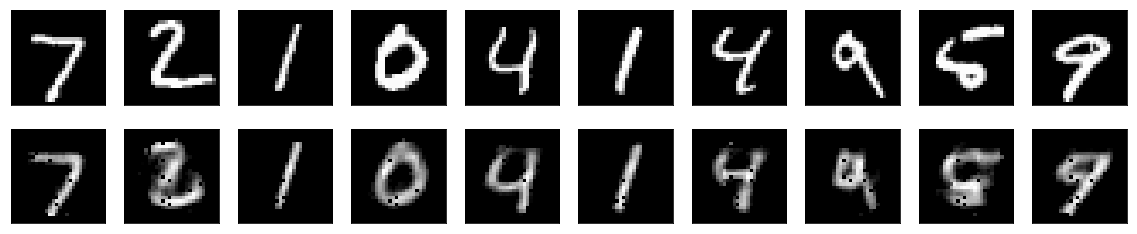

In [163]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_3d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [72]:
autoencoder.save('toy_model_lstm_with_attention.h5')

In [107]:
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

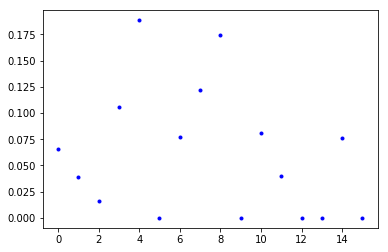

In [38]:
plt.plot(intermediate_output[0],'b.')

In [ ]:
width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)